In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy.stats import stats

warnings.filterwarnings('ignore')

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_data = pd.read_sql_query('select * from studentsperformance', con = engine)

engine.dispose
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


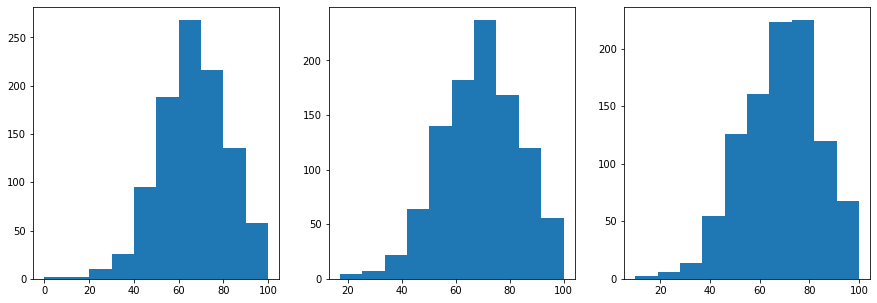

In [5]:
#gather data on dataset
continuous_var = ['math score', 'reading score', 'writing score']
plt.figure(figsize= (15,5))
x = 1
for col in continuous_var:
  plt.subplot(1,3,x)
  plt.hist(student_data[col])
  x = x + 1

# these seme normally distributed and dont have outliers, winsorization not necesarry


In [7]:
# Are there any differences between the genders, ethnicities, and parental level 
# of education with respect to their performances in exams?

variables = ['math score', 'reading score', 'writing score']

student_data.groupby('gender').mean()
stats.ttest_ind(student_data[student_data['gender'] == 'male'][variables],
                student_data[student_data['gender'] == 'female'][variables])

Ttest_indResult(statistic=array([ 5.38324587, -7.95930801, -9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

In [0]:
student_data.groupby('race/ethnicity').mean()
ethnicities = student_data['race/ethnicity'].unique()
ethnicities.sort()
for var in variables:
  print('-----------------------------')
  print('Comparisons for variable: {}'.format(var))
  print('-----------------------------')
  for i in range (0, len(ethnicities)):
    for j in range (i + 1, len(ethnicities)):
      print('T-test between group {} and group {}'.format(ethnicities[i],ethnicities[j]))
      print(stats.ttest_ind(
          student_data[student_data['race/ethnicity'] == ethnicities[i]][var],
          student_data[student_data['race/ethnicity'] == ethnicities[j]][var]))

In [0]:
student_data.groupby('parental level of education').mean()
education_levels = student_data['parental level of education'].unique()
education_levels.sort()
for var in variables:
  print('-----------------------------')
  print('Comparisons for variable: {}'.format(var))
  print('-----------------------------')
  for i in range (0, len(education_levels)):
    for j in range (i + 1, len(education_levels)):
      print(stats.ttest_ind(
          student_data[student_data['parental level of education'] == education_levels[i]][var],
          student_data[student_data['parental level of education'] == education_levels[j]][var]
      ))
      

In [29]:
#Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
student_data.groupby('lunch').mean()
student_data.info()
print(student_data['lunch'].unique())
stats.ttest_ind(student_data[student_data['lunch'] == 'standard'][variables], student_data[student_data['lunch'] == 'free/reduced'][variables])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
['standard' 'free/reduced']


Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

In [32]:
student_data.groupby('test preparation course').mean()
stats.ttest_ind(student_data[student_data['test preparation course'] == 'completed'][variables], student_data[student_data['test preparation course'] == 'none'][variables])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

In [33]:
student_data[variables].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
